# Assignment 1: Wrangling and EDA
### Foundations of Machine Learning

In [33]:
import urllib.request
import os
import zipfile
import os

def download_data(force=False):
    """Download and extract course data from Zenodo."""

    zip_path = 'data.zip'
    data_dir = './data'

    if not os.path.exists(zip_path) or force:
        print("Downloading course data...")
        urllib.request.urlretrieve(
            'https://zenodo.org/records/18235955/files/data.zip?download=1',
            zip_path
        )
        print("Download complete")

    if not os.path.exists(data_dir) or force:
        print("Extracting data files...")
        with zipfile.ZipFile(zip_path, 'r') as zip_ref:
            zip_ref.extractall(data_dir)
        print("Data extracted")

    return data_dir


if __name__ == "__main__":
    download_data()

**Q1.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `airbnb_NYC.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)
2. Categorical variable: For the Minnesota police use of for data, `mn_police_use_of_force.csv`, clean the `subject_injury` variable, handling the NA's; this gives a value `Yes` when a person was injured by police, and `No` when no injury occurred. What proportion of the values are missing? Cross-tabulate your cleaned `subject_injury` variable with the `force_type` variable. Are there any patterns regarding when the data are missing? For the remaining missing values, replace the `np.nan/None` values with the label `Missing`.
3. Dummy variable: For `metabric.csv`, convert the `Overall Survival Status` variable into a dummy/binary variable, taking the value 0 if the patient is deceased and 1 if they are living.
4. Missing values: For `airbnb_NYC.csv`, determine how many missing values of `Review Scores Rating` there are. Create a new variable, in which you impute the median score for non-missing observations to the missing ones. Why might this bias or otherwise negatively impact your results?

In [102]:
# Q1.1

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats.mstats import winsorize

airbnb = pd.read_csv('/content/data/airbnb_NYC.csv',
                     encoding='latin1')

airbnb["Price_clean"] = (
    airbnb["Price"]
    .astype(str)
    .str.replace(r"[\$,]", "", regex=True)
)

airbnb["Price_clean"] = pd.to_numeric(
    airbnb["Price_clean"], errors="coerce"
)

airbnb["Price_clean"].isna().sum()


np.int64(0)

In [35]:
# Q1.2

police = pd.read_csv("/content/data/mn_police_use_of_force.csv", encoding = 'latin1')

police["subject_injury"].isna().mean()


np.float64(0.7619342359767892)

In [36]:
pd.crosstab(
    police["force_type"],
    police["subject_injury"],
    dropna=False
)

subject_injury,No,Yes,NaN
force_type,,,
Baton,0,2,2
Bodily Force,1093,1286,7051
Chemical Irritant,131,41,1421
Firearm,2,0,0
Gun Point Display,33,44,27
Improvised Weapon,34,40,74
Less Lethal,0,0,87
Less Lethal Projectile,1,2,0
Maximal Restraint Technique,0,0,170


In [37]:
police["subject_injury_clean"] = police["subject_injury"].fillna("Missing")

police.head(5)

,response_datetime,problem,is_911_call,primary_offense,subject_injury,force_type,force_type_action,race,sex,age,type_resistance,precinct,neighborhood,subject_injury_clean
0,2016/01/01 00:47:36,Assault in Progress,Yes,DASLT1,NaN,Bodily Force,Body Weight to Pin,Black,Male,20.0,Tensed,1,Downtown East,Missing
1,2016/01/01 02:19:34,Fight,No,DISCON,NaN,Chemical Irritant,Personal Mace,Black,Female,27.0,Verbal Non-Compliance,1,Downtown West,Missing
2,2016/01/01 02:19:34,Fight,No,DISCON,NaN,Chemical Irritant,Personal Mace,White,Female,23.0,Verbal Non-Compliance,1,Downtown West,Missing
3,2016/01/01 02:28:48,Fight,No,PRIORI,NaN,Chemical Irritant,Crowd Control Mace,Black,Male,20.0,Commission of Crime,1,Downtown West,Missing
4,2016/01/01 02:28:48,Fight,No,PRIORI,NaN,Chemical Irritant,Crowd Control Mace,Black,Male,20.0,Commission of Crime,1,Downtown West,Missing


In [38]:
metabric = pd.read_csv("/content/data/metabric.csv",
                       encoding = 'latin1')

metabric["Survival Binary"] = metabric["Overall Survival Status"].map({
    "Living": 1,
    "Deceased": 0
})


In [39]:
airbnb["Review Scores Rating"].isna().sum()


np.int64(8323)

In [40]:
median_score = airbnb["Review Scores Rating"].median()

airbnb["Review_Score_Imputed"] = airbnb["Review Scores Rating"].fillna(
    median_score
)

airbnb.head(5)

,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating,Price_clean,Review_Score_Imputed
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN,145,94.0
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN,37,94.0
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN,28,94.0
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN,199,94.0
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0,549,96.0


**Q2.** Go to https://sharkattackfile.net/ and download their dataset on shark attacks.

1. Open the shark attack file using Pandas. It is probably not a csv file, so `read_csv` won't work. What does work?
2. Drop any columns that do not contain data.
3. What is an observation? Carefully justify your answer, and explain how it affects your choices in cleaning and analyzing the data.
4. Clean the year variable. Describe the range of values you see. Filter the rows to focus on attacks since 1940. Are attacks increasing, decreasing, or remaining constant over time?
5. Clean the Age variable and make a histogram of the ages of the victims.
6. Clean the `Type` variable so it only takes three values: Provoked and Unprovoked and Unknown. What proportion of attacks are unprovoked?
7. Clean the `Fatal Y/N` variable so it only takes three values: Y, N, and Unknown.
8. Is the attack more or less likely to be fatal when the attack is provoked or unprovoked? Thoughts?

In [41]:
sharks = pd.read_excel("/GSAF5.xls")\

sharks = sharks[['Date', 'Year', 'Type', 'Country', 'State', 'Location',
                 'Activity', 'Name', 'Sex', 'Age', 'Injury', 'Fatal Y/N',
                 'Time', 'Species ', 'Source']]

sharks.head(5)

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,Injury,Fatal Y/N,Time,Species,Source
0,29th January,2026.0,Unprovoked,Brazil,Recife,Del Chifre Beach in Olinda,Swimming,Deivson Rocha Dantas,M,13,Right thigh and lower leg stripped of flesh,Y,?,Unknown bull and tiger sharks frequent the area,Kevin McMurray Trackingsharks.com: TV Globo: P...
1,29th January,2026.0,Unprovoked,Australia,NSW,Angels Beach East Ballina,Surfing,Unnamed man,M,?,No injury shark knocked man of his board,N,1100hrs,Unknown,Bob Myatt GSAF
2,24th January,2026.0,Unprovoked,Australia,Tasmania,Cooee Beach west of Burnie,Swimming,Megan Stokes,F,?,Puncture wounds to right knee,N,1815hrs,1.7m Seven Gill shark,Bob Myatt GSAF
3,20th January,2026.0,Unprovoked,Australia,NSW,Point Plomber North of Port Macquarie,Surfing,Paul Zvirdinas,M,39,Minor cuts and abrasions,N,0830hrs,Bull shark,Bob Myatt GSAF
4,19th January,2026.0,Unprovoked,Australia,NSW,Dee Why,Surfing,Unknown,M,11,None reported damage to board,N,1145hrs,Bull shark,Andy Currie


In [42]:
sharks["Year"] = (
    sharks["Year"]
    .astype(str)
    .str.extract(r"(\d{4})")
    .astype(float)
)

sharks["Year"].describe()

,Year
count,6941.000000
mean,1972.531336
std,51.059408
min,1000.000000
25%,1951.000000
50%,1988.000000
75%,2010.000000
max,2026.000000


In [43]:
sharks_new = sharks[sharks["Year"] >= 1940]

sharks_year = sharks_new["Year"].value_counts().sort_index()

sharks_year.head(5)

,count
Year,
1940.0,24
1941.0,27
1942.0,41
1943.0,28
1944.0,31


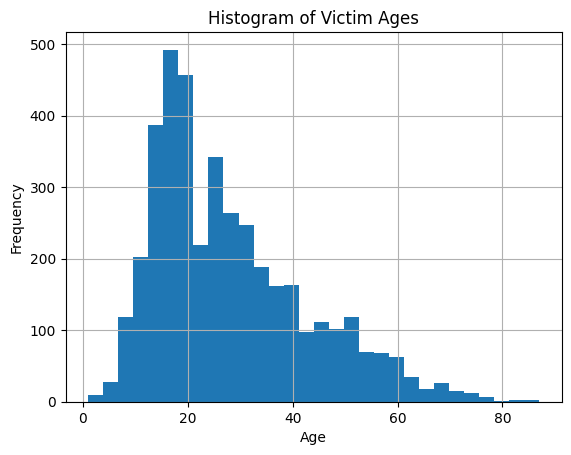

In [44]:
sharks["Age"] = (
    sharks["Age"]
    .astype(str)
    .str.extract(r"(\d+)")
    .astype(float)
)

sharks["Age"].hist(bins=30)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Histogram of Victim Ages")
plt.show()

In [46]:
def type_clean(type):
    type = str(type).strip().lower()
    if "unprovoked" in type:
        return "Unprovoked"
    elif "provoked" in type:
        return "Provoked"
    else:
        return "Unknown"

sharks["Type"] = sharks["Type"].apply(type_clean)
sharks.head(5)


sharks.head(3)

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,Injury,Fatal Y/N,Time,Species,Source
0,29th January,2026.0,Unprovoked,Brazil,Recife,Del Chifre Beach in Olinda,Swimming,Deivson Rocha Dantas,M,13.0,Right thigh and lower leg stripped of flesh,Y,?,Unknown bull and tiger sharks frequent the area,Kevin McMurray Trackingsharks.com: TV Globo: P...
1,29th January,2026.0,Unprovoked,Australia,NSW,Angels Beach East Ballina,Surfing,Unnamed man,M,NaN,No injury shark knocked man of his board,N,1100hrs,Unknown,Bob Myatt GSAF
2,24th January,2026.0,Unprovoked,Australia,Tasmania,Cooee Beach west of Burnie,Swimming,Megan Stokes,F,NaN,Puncture wounds to right knee,N,1815hrs,1.7m Seven Gill shark,Bob Myatt GSAF


In [50]:
def fatal_clean(fatal):
    fatal = str(fatal).strip().lower()
    if "y" in fatal:
        return "Y"
    elif "n" in fatal:
        return "N"
    else:
        return "Unknown"

sharks["Fatal Y/N"] = sharks["Fatal Y/N"].apply(fatal_clean)
sharks.head(5)


sharks.head(3)

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,Injury,Fatal Y/N,Time,Species,Source
0,29th January,2026.0,Unprovoked,Brazil,Recife,Del Chifre Beach in Olinda,Swimming,Deivson Rocha Dantas,M,13.0,Right thigh and lower leg stripped of flesh,Y,?,Unknown bull and tiger sharks frequent the area,Kevin McMurray Trackingsharks.com: TV Globo: P...
1,29th January,2026.0,Unprovoked,Australia,NSW,Angels Beach East Ballina,Surfing,Unnamed man,M,NaN,No injury shark knocked man of his board,Y,1100hrs,Unknown,Bob Myatt GSAF
2,24th January,2026.0,Unprovoked,Australia,Tasmania,Cooee Beach west of Burnie,Swimming,Megan Stokes,F,NaN,Puncture wounds to right knee,Y,1815hrs,1.7m Seven Gill shark,Bob Myatt GSAF


In [51]:
type_compare = pd.crosstab(
    sharks["Type"],
    sharks["Fatal Y/N"])

type_compare

Fatal Y/N,N,Y
Type,,
Provoked,2,642
Unknown,3,1201
Unprovoked,4,5222


**Q3.** Open the "tidy_data.pdf" document available in `https://github.com/ds4e/wrangling`, which is a paper called *Tidy Data* by Hadley Wickham.

  1. Read the abstract. What is this paper about?

  This paper is about how to clean data more effectively with tools, to meet a standard that makes the data easy to work with.

  2. Read the introduction. What is the "tidy data standard" intended to accomplish?

The standard is intended to make datasets universally easy to visualize and analyze by breaking it down into fields, records, and tables.

  3. Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."

  The first sentence means that tidy datasets follow the same patterns and are indistinguishable in general structure, whereas messy datasets can stray from the standard in many different ways.

  The second sentence means that when data is organized, it is easy to describe its structure, but figuring out how to organize it in the first place is difficult and somewhat abstract.

  4. Read Section 2.2. How does Wickham define values, variables, and observations?

Values are single numbers or strings that belong to one variable and observation. Variables contain all of the values that measure or describe the same thing. Observations are one instance at which all pertaining variables are measured.

  5. How is "Tidy Data" defined in section 2.3?

Tidy data is data organized such that each observation forms a row, each variable forms a column, and each observational unit forms a table.

  6. Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?

The most common problems are multiple variables in one column, variables in both rows and columns, values as column headers, multiple observational units stored in one table, and a single observational unit split across tables. Melting a dataset is breaking the problematic dataset from multiple variables into rows of single observations and measurement categories into single variables.

  7. Why, specifically, is table 11 messy but table 12 tidy and "molten"?

  Each day is considered an individual observation, so the table needed to be broken down by date to have only true variables as columns.

**Q4.** This question looks at financial transfers from international actors to American universities. In particular, from which countries and giftors are the gifts coming from, and to which institutions are they going?

For this question, `.groupby([vars]).count()` and `.groupby([vars]).sum()` will be especially useful to tally the number of occurrences and sum the values of those occurrences.

1. Load the `ForeignGifts_edu.csv` dataset.
2. For `Foreign Gift Amount`, create a histogram and describe the variable. Describe your findings.

The gift amount is strongly skewed to the right, with most gifts falling under 5 million dollars, but with values ranging up to 100 million.

3. For `Gift Type`, create a histogram or value counts table. What proportion of the gifts are contracts, real estate, and monetary gifts?

About 60% are contracts, around 40% are monetary, and very very few are real estate.

4. What are the top 15 countries in terms of the number of gifts? What are the top 15 countries in terms of the amount given?

Lists are shown in output below.

5. What are the top 15 institutions in terms of the total amount of money they receive? Make a histogram of the total amount received by all institutions.

List shown in output below.

6. Which giftors provide the most money, in total?

See list below.

In [80]:
foreign = pd.read_csv("/content/data/ForeignGifts_edu.csv",
                      encoding = 'latin1')

foreign.head(3)

,ID,OPEID,Institution Name,City,State,Foreign Gift Received Date,Foreign Gift Amount,Gift Type,Country of Giftor,Giftor Name
0,1,102000,Jacksonville State University,Jacksonville,AL,43738,250000,Monetary Gift,CHINA,NaN
1,2,104700,Troy University,Troy,AL,43592,463657,Contract,CHINA,Confucius Institute Headquarters
2,3,105100,University of Alabama,Tuscaloosa,AL,43466,3649107,Contract,ENGLAND,Springer Nature Customer Service Ce


<function matplotlib.pyplot.show(close=None, block=None)>

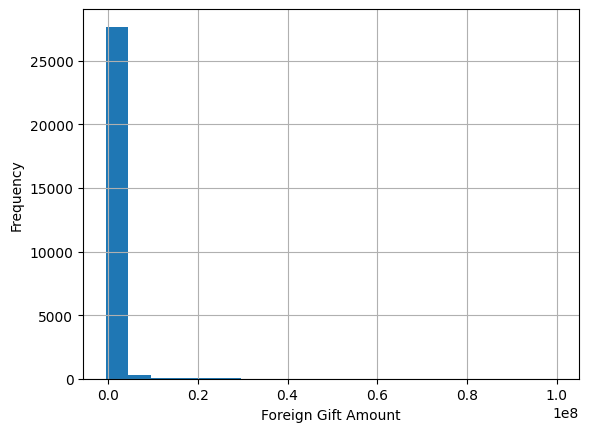

In [86]:
foreign["Foreign Gift Amount"].hist(bins=20)
plt.xlabel("Foreign Gift Amount")
plt.ylabel("Frequency")
plt.show

In [88]:
foreign["Gift Type"].value_counts(normalize=True)

,proportion
Gift Type,
Contract,0.612097
Monetary Gift,0.387513
Real Estate,0.000390


In [92]:
country_count = (
    foreign.groupby("Country of Giftor")["Foreign Gift Amount"]
         .count()
         .sort_values(ascending=False)
         .head(15)
)
country_count


,Foreign Gift Amount
Country of Giftor,
ENGLAND,3655
CHINA,2461
CANADA,2344
JAPAN,1896
SWITZERLAND,1676
SAUDI ARABIA,1610
FRANCE,1437
GERMANY,1394
HONG KONG,1080


In [95]:
country_amount = (
    foreign.groupby("Country of Giftor")["Foreign Gift Amount"]
         .sum()
         .sort_values(ascending=False)
         .head(15)
)
country_amount


,Foreign Gift Amount
Country of Giftor,
QATAR,2706240869
ENGLAND,1464906771
CHINA,1237952112
SAUDI ARABIA,1065205930
BERMUDA,899593972
CANADA,898160656
HONG KONG,887402529
JAPAN,655954776
SWITZERLAND,619899445


In [99]:
college_amount = (
    foreign.groupby("Institution Name")["Foreign Gift Amount"]
         .sum()
         .sort_values(ascending=False)
)
college_amount.head(15)


,Foreign Gift Amount
Institution Name,
Carnegie Mellon University,1477922504
Cornell University,1289937761
Harvard University,954803610
Massachusetts Institute of Technology,859071692
Yale University,613441311
Texas A&M University,521455050
Johns Hopkins University,502409595
Northwestern University,402316221
Georgetown University,379950511


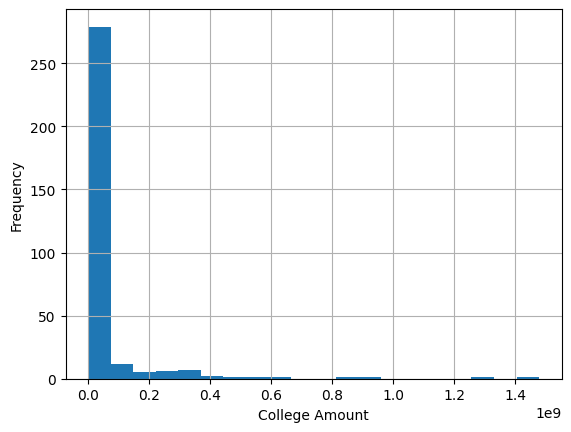

In [100]:
college_amount.hist(bins=20)
plt.xlabel("College Amount")
plt.ylabel("Frequency")
plt.show()

In [101]:
giftor_amount = (
    foreign.groupby("Giftor Name")["Foreign Gift Amount"]
         .sum()
         .sort_values(ascending=False)
)
giftor_amount.head(15)


,Foreign Gift Amount
Giftor Name,
Qatar Foundation,1166503744
Qatar Foundation/Qatar National Res,796197000
Qatar Foundation for Education,373945215
Anonymous,338793629
Saudi Arabian Cultural Mission,275221475
HCL,190000000
Church of Jesus Christ of LDS,185203715
Emirates Institute for Advanced Sc,170641244
QIC,148355497


**Q5.** This question provides some practice doing exploratory data analysis and visualization.

We'll use the `college_completion.csv` dataset from the US Department of Education. The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `college_completion.csv` data with Pandas.
2. How many observations and variables are in the data? Use `.head()` to examine the first few rows of data.

3798 observations across 63 variables

3. Cross tabulate `control` and `level`. Describe the patterns you see in words.

Public colleges had the most students in this study, and the vast majority of students at private, non for-profit schools were in 4 year programs

4. For `grad_100_value`, create a kernel density plot and describe table. Now condition on `control`, and produce a kernel density plot and describe tables for each type of institutional control. Which type of institution appear to have the most favorable graduation rates?

Private non for-profit schools have the best graduation rates.

5. Make a scatterplot of `grad_100_value` by `aid_value`, and compute the covariance and correlation between the two variables. Describe what you see. Now make the same plot and statistics, but conditioning on `control`. Describe what you see. For which kinds of institutions does aid seem to vary positively with graduation rates?

Without looking at control, most colleges seem to have low graduation rates and offer little aid, with the cluster extending to the top with little aid, and another cluster extending to the top right. When looking at the breakdown by control, we see that the private non for-profit schools represent the cluster that demonstrates increased graduation rates with higher aid.

In [66]:
college = pd.read_csv("/content/data/college_completion.csv")

college.shape

(3798, 63)

In [67]:
college.head(3)

,index,unitid,chronname,city,state,level,control,basic,hbcu,flagship,...,vsa_grad_after6_transfer,vsa_grad_elsewhere_after6_transfer,vsa_enroll_after6_transfer,vsa_enroll_elsewhere_after6_transfer,similar,state_sector_ct,carnegie_ct,counted_pct,nicknames,cohort_size
0,0,100654,Alabama A&M University,Normal,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,36.4,5.6,17.2,11.1,232937|100724|405997|113607|139533|144005|2285...,13,386,99.7|07,NaN,882.0
1,1,100663,University of Alabama at Birmingham,Birmingham,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,NaN,NaN,NaN,NaN,196060|180461|201885|145600|209542|236939|1268...,13,106,56.0|07,UAB,1376.0
2,2,100690,Amridge University,Montgomery,Alabama,4-year,Private not-for-profit,Baccalaureate Colleges--Arts & Sciences,NaN,NaN,...,NaN,NaN,NaN,NaN,217925|441511|205124|247825|197647|221856|1353...,16,252,100.0|07,NaN,3.0


In [69]:
crosstab2 = pd.crosstab(
    college["control"],
    college["level"]
)

crosstab2

level,2-year,4-year
control,,
Private for-profit,465,527
Private not-for-profit,68,1180
Public,926,632


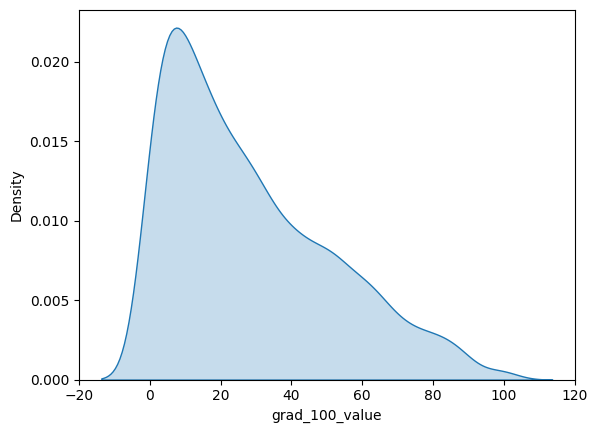

,grad_100_value
count,3467.000000
mean,28.364465
std,23.312730
min,0.000000
25%,9.000000
50%,22.500000
75%,43.650000
max,100.000000


In [72]:
sns.kdeplot(data=college, x="grad_100_value", fill=True)
plt.show()

college["grad_100_value"].describe()


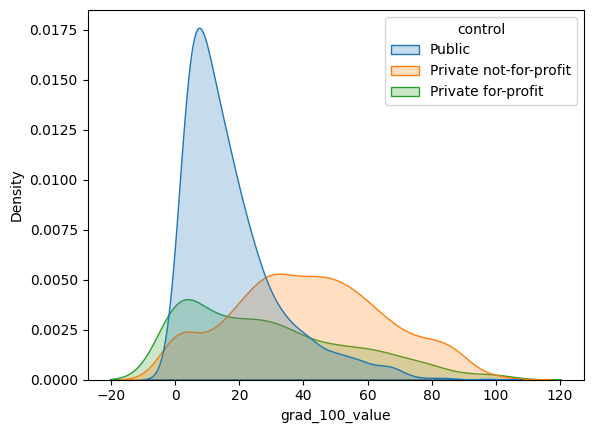

,count,mean,std,min,25%,50%,75%,max
control,,,,,,,,
Private for-profit,779.0,29.108858,25.601687,0.0,6.95,24.7,46.75,100.0
Private not-for-profit,1189.0,41.660976,23.551231,0.0,25.00,41.0,58.30,100.0
Public,1499.0,17.430887,14.729443,0.0,6.90,13.2,23.25,97.8


In [73]:
sns.kdeplot(data=college, x="grad_100_value", hue="control", fill=True)
plt.show()

college.groupby("control")["grad_100_value"].describe()


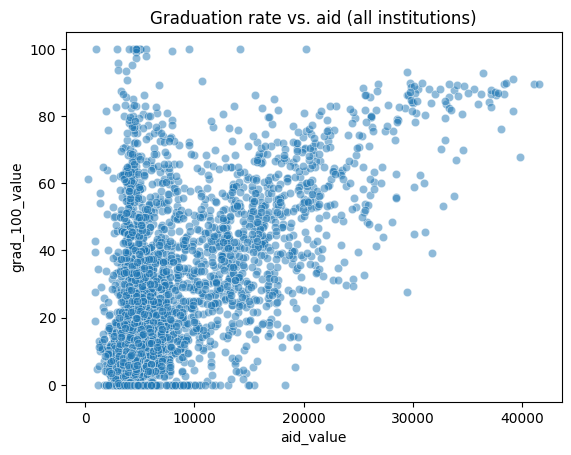

(np.float64(88610.48316902411), np.float64(0.5758792845936064))

In [77]:
sns.scatterplot(data=college, x="aid_value", y="grad_100_value", alpha=0.5)
plt.title("Graduation rate vs. aid (all institutions)")
plt.show()

cov = college[["aid_value", "grad_100_value"]].cov().iloc[0, 1]
corr = college[["aid_value", "grad_100_value"]].corr().iloc[0, 1]
cov, corr


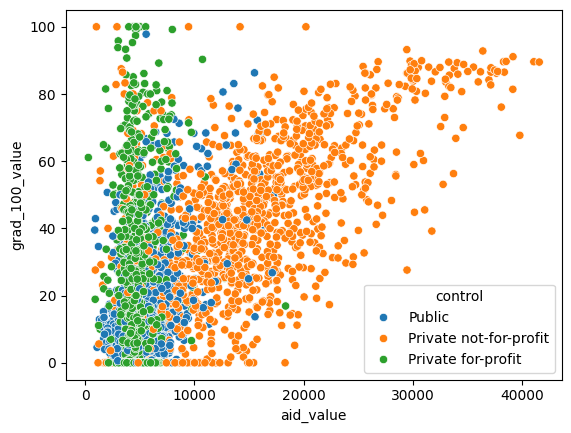

In [78]:
sns.scatterplot(
    data=college,
    x="aid_value",
    y="grad_100_value",
    hue="control"
)
plt.show()

college.groupby("control")[["aid_value", "grad_100_value"]].corr().groupby(level=0)


**Q6.** In class, we talked about how to compute the sample mean of a variable $X$,
$$
m(X) = \dfrac{1}{N} \sum_{i=1}^N x_i
$$
and sample covariance of two variables $X$ and $Y$,
$$
\text{cov}(X,Y) = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))(y_i - m(Y))).
$$
Recall, the sample variance of $X$ is
$$
s^2 = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))^2.
$$
It can be very helpful to understand some basic properties of these statistics. If you want to write your calculations on a piece of paper, take a photo, and upload that to your GitHub repo, that's probably easiest.

We're going to look at **linear transformations** of $X$, $Y = a + bX$. So we take each value of $X$, $x_i$, and transform it as $y_i = a + b x_i$.

1. Show that $m(a + bX) = a+b \times m(X)$.
2. Show that $ \text{cov}(X,X) = s^2$.
3. Show that $\text{cov}(X,a+bY) = b \times \text{cov}(X,Y)$
4. Show that $\text{cov}(a+bX,a+bY) = b^2 \text{cov}(X,Y) $. Notice, this also means that $\text{cov}(bX, bX) = b^2 s^2$.
5. Suppose $b>0$ and let the median of $X$ be $\text{med}(X)$. Is it true that the median of $a+bX$ is equal to $a + b \times \text{med}(X)$? Is the IQR of $a + bX$ equal to $a + b \times \text{IQR}(X)$?
6. Show by example that the means of $X^2$ and $\sqrt{X}$ are generally not $(m(X))^2$ and $\sqrt{m(X)}$. So, the results we derived above really depend on the linearity of the transformation $Y = a + bX$, and transformations like $Y = X^2$ or $Y = \sqrt{X}$ will not behave in a similar way.

**Q7.** This question provides some practice doing exploratory data analysis and visualization.

We'll use the `ames_prices.csv` dataset. The "relevant" variables for this question are:
  - `price` - Sale price value of the house
  - `Bldg.Type` - Building type of the house (single family home, end-of-unit townhome, duplex, interior townhome, two-family conversion)

1. Load the `ames_prices.csv` data with Pandas.
2. Make a kernel density plot of price and compute a describe table. Now, make a kernel density plot of price conditional on building type, and use `.groupby()` to make a describe type for each type of building. Which building types are the most expensive, on average? Which have the highest variance in transaction prices?

Townhouses are most expensive on average, but single family homes have the highest variance.

3. Make an ECDF plot of price, and compute the sample minimum, .25 quantile, median, .75 quantile, and sample maximum (i.e. a 5-number summary).

4. Make a boxplot of price. Are there outliers? Make a boxplot of price conditional on building type. What patterns do you see?

There are many high outliers, and making it conditional on building type shows that single family homes account for most of the outliers. High density housing types account for the few low outliers.

5. Make a dummy variable indicating that an observation is an outlier.



6. Winsorize the price variable, and compute a new kernel density plot and describe table. How do the results change?

The winsorized kernel density plot reduces the length of the right tail and the mean is more comparable to the median.


In [103]:
ames = pd.read_csv("/content/data/ames_prices.csv",
                   encoding = 'latin1')

ames.head()


,Order,PID,area,price,MS.SubClass,MS.Zoning,Lot.Frontage,Lot.Area,Street,Alley,...,Screen.Porch,Pool.Area,Pool.QC,Fence,Misc.Feature,Misc.Val,Mo.Sold,Yr.Sold,Sale.Type,Sale.Condition
0,1,526301100,1656,215000,20,RL,141.0,31770,Pave,NaN,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
1,2,526350040,896,105000,20,RH,80.0,11622,Pave,NaN,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
2,3,526351010,1329,172000,20,RL,81.0,14267,Pave,NaN,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
3,4,526353030,2110,244000,20,RL,93.0,11160,Pave,NaN,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
4,5,527105010,1629,189900,60,RL,74.0,13830,Pave,NaN,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal


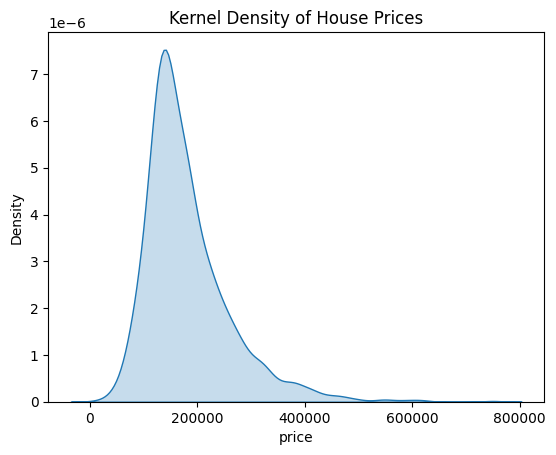

,price
count,2930.000000
mean,180796.060068
std,79886.692357
min,12789.000000
25%,129500.000000
50%,160000.000000
75%,213500.000000
max,755000.000000


In [104]:
sns.kdeplot(data=ames, x="price", fill=True)
plt.title("Kernel Density of House Prices")
plt.show()

ames["price"].describe()


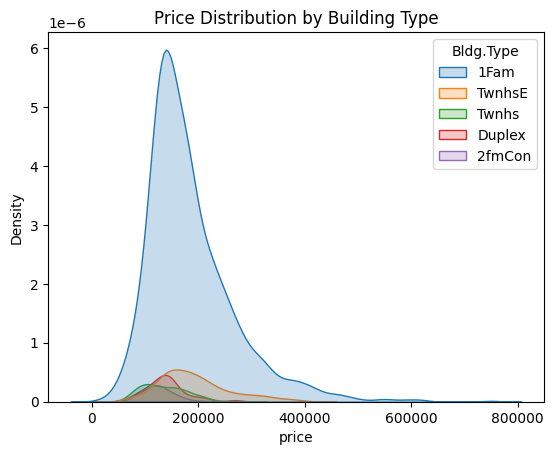

,count,mean,std,min,25%,50%,75%,max
Bldg.Type,,,,,,,,
1Fam,2425.0,184812.041237,82821.802329,12789.0,130000.0,165000.0,220000.0,755000.0
2fmCon,62.0,125581.709677,31089.239840,55000.0,106562.5,122250.0,140000.0,228950.0
Duplex,109.0,139808.935780,39498.973534,61500.0,118858.0,136905.0,153337.0,269500.0
Twnhs,101.0,135934.059406,41938.931130,73000.0,100500.0,130000.0,170000.0,280750.0
TwnhsE,233.0,192311.914163,66191.738021,71000.0,145000.0,180000.0,222000.0,392500.0


In [106]:
sns.kdeplot(data=ames, x="price", hue="Bldg.Type", fill=True)
plt.title("Price Distribution by Building Type")
plt.show()

ames.groupby("Bldg.Type")["price"].describe()


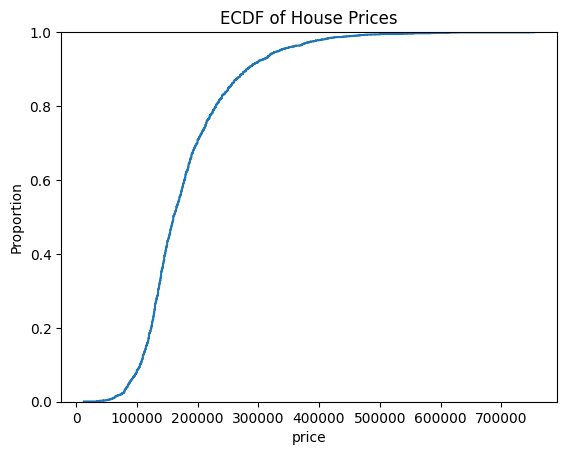

,price
0.00,12789.0
0.25,129500.0
0.50,160000.0
0.75,213500.0
1.00,755000.0


In [108]:
sns.ecdfplot(data=ames, x="price")
plt.title("ECDF of House Prices")
plt.show()

summary = ames["price"].quantile([0, 0.25, 0.5, 0.75, 1])
summary


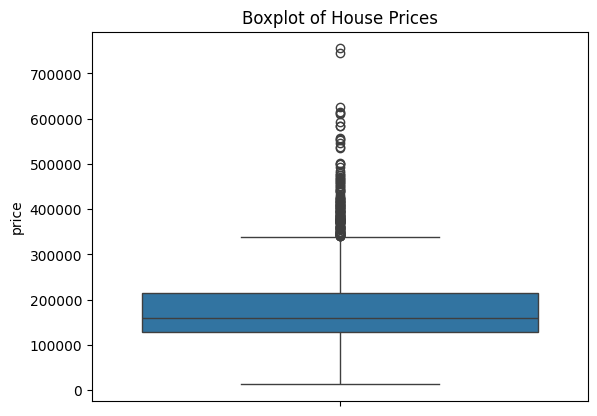

In [109]:
sns.boxplot(data=ames, y="price")
plt.title("Boxplot of House Prices")
plt.show()


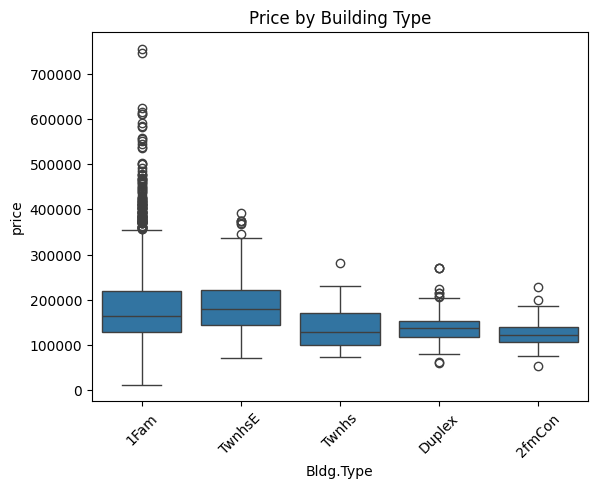

In [110]:
sns.boxplot(data=ames, x="Bldg.Type", y="price")
plt.title("Price by Building Type")
plt.xticks(rotation=45)
plt.show()


In [114]:
Q1 = ames["price"].quantile(0.25)
Q3 = ames["price"].quantile(0.75)
IQR = Q3 - Q1

upper = Q3 + 1.5 * IQR

ames["outlier"] = (ames["price"] > upper).astype(int)

ames["outlier"].value_counts()


,count
outlier,
0,2793
1,137


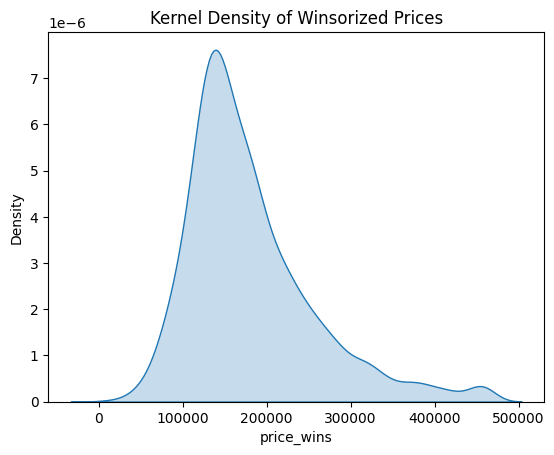

/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:4968: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


,price_wins
count,2930.000000
mean,179963.673720
std,76099.977951
min,12789.000000
25%,129500.000000
50%,160000.000000
75%,213500.000000
max,457347.000000


In [115]:
ames["price_wins"] = winsorize(ames["price"], limits=[0, 0.01])

sns.kdeplot(data=ames, x="price_wins", fill=True)
plt.title("Kernel Density of Winsorized Prices")
plt.show()

ames["price_wins"].describe()
